# Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# allow plots to appear within the notebook
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/cleaned_sentiment_scores.csv')
df.head()

,Unnamed: 0,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
0,0,2018-12-31,0.136517,0.788544,0.073079,0.124860,3625.00,3835.40,3829.00,3691.86,12799.942626,1.0
1,1,2019-01-01,0.134739,0.794936,0.064983,0.131509,3651.02,3841.17,3691.87,3826.10,10812.884988,1.0
2,2,2019-01-02,0.122337,0.802931,0.071270,0.110496,3770.07,3916.57,3826.10,3890.79,9982.470846,0.0
3,3,2019-01-03,0.142155,0.784032,0.071371,0.134599,3758.07,3893.80,3890.80,3787.57,9327.647089,1.0
4,4,2019-01-04,0.123961,0.799690,0.074883,0.122857,3730.00,3849.00,3787.57,3820.82,9225.150500,0.0


In [3]:
# Drop Unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Drop all rows with null values
df = df.dropna()

In [5]:
# Convert price_difference column to integer
df['price_difference'] = df['price_difference'].astype(int)

In [6]:
df.dtypes

time                 object
avg_positive        float64
avg_neutral         float64
avg_negative        float64
avg_compound        float64
low                 float64
high                float64
open                float64
close               float64
volume              float64
price_difference      int32
dtype: object

In [7]:
df.describe()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.00000
mean,0.126358,0.797525,0.071027,0.116083,16904.146364,18055.138245,17520.930993,17559.139154,15965.656921,0.54023
std,0.007096,0.008776,0.005423,0.021458,15269.003101,16453.135551,15928.370120,15944.747315,12860.928639,0.49864
min,0.105114,0.690477,0.052550,0.020495,3337.870000,3383.140000,3358.990000,3359.000000,2699.830014,0.00000
25%,0.121881,0.792867,0.067308,0.103479,7570.000000,8059.990000,7822.880000,7859.790000,8026.496207,0.00000
50%,0.126148,0.797687,0.070755,0.116991,9610.270000,10178.910000,9880.860000,9894.040000,12379.412165,1.00000
75%,0.130536,0.802636,0.074477,0.131259,22600.000000,24090.000000,23226.180000,23476.510000,19182.049347,1.00000
max,0.176566,0.831542,0.091292,0.180401,62036.730000,64899.000000,63588.220000,63588.220000,130316.646844,1.00000


In [8]:
# Create X and y features
X = df[['avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound']]
y = df[['price_difference']]

## Logistic Regression

In [9]:
# Create train, test, split datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train1)

X_test1 = sc.transform(X_test1)

In [11]:
# Create instance of classifier
LogReg = LogisticRegression()

LogReg.fit(X_train1, y_train1.values.ravel())

y_pred1 = LogReg.predict(X_test1)

In [12]:
# Metrics
print("Logistic Regression Model")
print("Accuracy:", metrics.accuracy_score(y_test1, y_pred1))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test1, y_pred1))
print('Precision score' , metrics.precision_score(y_test1, y_pred1))
print('Recall score' , metrics.recall_score(y_test1, y_pred1))

Logistic Regression Model
Accuracy: 0.5
Balanced accuracy: 0.5096251266464032
Precision score 0.49458483754512633
Recall score 0.9716312056737588


In [13]:
# Classification Report
print(metrics.classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.05      0.09       147
           1       0.49      0.97      0.66       141

    accuracy                           0.50       288
   macro avg       0.57      0.51      0.37       288
weighted avg       0.57      0.50      0.37       288



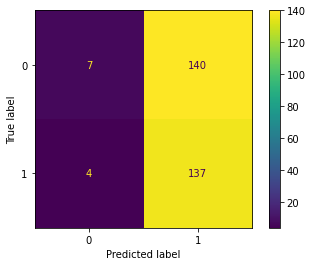

In [14]:
# plot confusion matrix
plot_confusion_matrix(LogReg, X_test1, y_test1)

### ROC & Precision Recall Curves

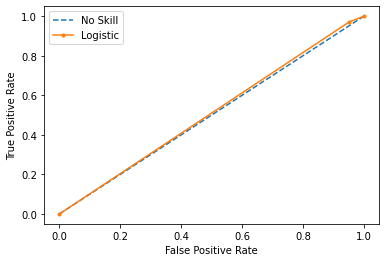

In [15]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

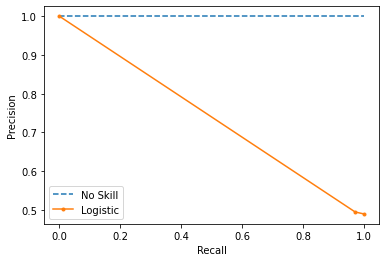

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test1, y_pred1)
# plot the roc curve for the model
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

## K Nearest Neighbors

In [17]:
# Create train, test, split datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train2 = sc.fit_transform(X_train2)

X_test2 = sc.transform(X_test2)

In [19]:
#Create KNN Classifier
knn = KNeighborsClassifier()
#knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = knn.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.4652777777777778


C:\Users\User1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# metrics
print("K Nearest Neighbors Model")
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test2, y_pred2))
print('Precision score' , metrics.precision_score(y_test2, y_pred2))
print('Recall score' , metrics.recall_score(y_test2, y_pred2))

K Nearest Neighbors Model
Accuracy: 0.4652777777777778
Balanced accuracy: 0.46678245766391663
Precision score 0.46060606060606063
Recall score 0.5390070921985816


In [21]:
# Classification Report
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       147
           1       0.46      0.54      0.50       141

    accuracy                           0.47       288
   macro avg       0.47      0.47      0.46       288
weighted avg       0.47      0.47      0.46       288



### Find Best Value of K

In [22]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2.values.ravel())
    y_pred2 = knn.predict(X_test2)
    scores.append(metrics.accuracy_score(y_test2, y_pred2))

print(scores)

[0.4791666666666667, 0.5034722222222222, 0.4895833333333333, 0.4826388888888889, 0.4652777777777778, 0.4618055555555556, 0.4513888888888889, 0.5034722222222222, 0.4375, 0.4756944444444444, 0.4548611111111111, 0.4652777777777778, 0.4513888888888889, 0.4618055555555556, 0.4722222222222222, 0.4826388888888889, 0.4722222222222222, 0.4756944444444444, 0.46875, 0.4722222222222222, 0.4826388888888889, 0.4791666666666667, 0.4756944444444444, 0.4861111111111111, 0.46875]


Text(0, 0.5, 'Testing Accuracy')

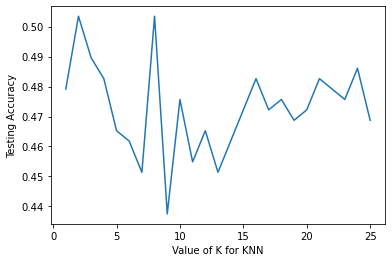

In [23]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### ROC & Precision Recall Curves

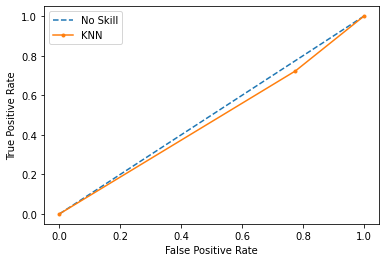

In [24]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

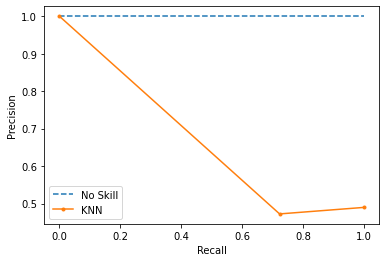

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test2, y_pred2)
# plot the roc curve for the model
no_skill = len(y_test2[y_test2==1]) / len(y_test2)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='KNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

## Support Vector Machine (SVM)

In [26]:
# Create train, test, split datasets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train3 = sc.fit_transform(X_train3)

X_test3 = sc.transform(X_test3)

In [28]:
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train3,y_train3)
#predict the response
y_pred3 = cls.predict(X_test3)

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
#accuracy
print("Support Vector Machine Model")
print("Accuracy:", metrics.accuracy_score(y_test3,y_pred3))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test3,y_pred3))
print('Precision score' , metrics.precision_score(y_test3,y_pred3))
print('Recall score' , metrics.recall_score(y_test3,y_pred3))

Support Vector Machine Model
Accuracy: 0.4895833333333333
Balanced accuracy: 0.5
Precision score 0.4895833333333333
Recall score 1.0


In [30]:
# Classification Report
print(metrics.classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.49      1.00      0.66       141

    accuracy                           0.49       288
   macro avg       0.24      0.50      0.33       288
weighted avg       0.24      0.49      0.32       288



C:\Users\User1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC & Precision Recall Curves

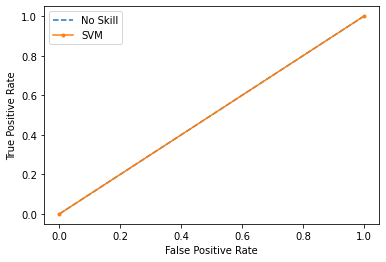

In [31]:
fpr, tpr, thresholds = roc_curve(y_test3, y_pred3)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

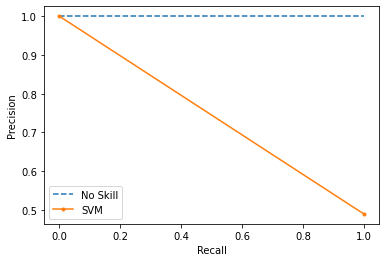

In [32]:
precision, recall, thresholds = precision_recall_curve(y_test3, y_pred3)
# plot the roc curve for the model
no_skill = len(y_test3[y_test3==1]) / len(y_test3)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='SVM')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

## Random Forest

In [33]:
# Create train, test, split datasets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train4 = sc.fit_transform(X_train4)

X_test4 = sc.transform(X_test4)

In [35]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train4, y_train4)
  
# performing predictions on the test dataset
y_pred4 = clf.predict(X_test4)
  
# using metrics module for accuracy calculation
print("Random Forest model")
print("Accuracy:", metrics.accuracy_score(y_test4,y_pred4))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test4,y_pred4))
print('Precision score' , metrics.precision_score(y_test4,y_pred4))
print('Recall score' , metrics.recall_score(y_test4,y_pred4))

<ipython-input-35-9ffefb866980>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train4, y_train4)


Random Forest model
Accuracy: 0.4618055555555556
Balanced accuracy: 0.4632363583731365
Precision score 0.4573170731707317
Recall score 0.5319148936170213


### ROC & Precision Recall Curves

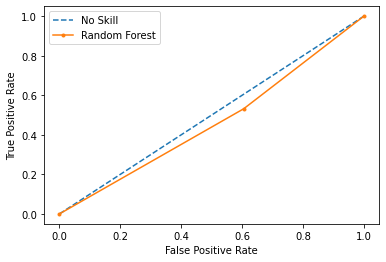

In [36]:
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#add AUC score
#put all ROC curves on the same chart
#put precision recall curves on the same chart

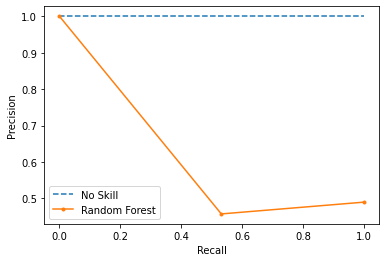

In [37]:
precision, recall, thresholds = precision_recall_curve(y_test4, y_pred4)
# plot the roc curve for the model
no_skill = len(y_test4[y_test4==1]) / len(y_test4)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

## Gradient Boosting

In [38]:
# Create train, test, split datasets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

X_train5 = sc.fit_transform(X_train5)

X_test5 = sc.transform(X_test5)

In [40]:
gb = GradientBoostingClassifier(learning_rate=1)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
# fitting training set
gb.fit(X_train5,y_train5)

# performing predictions on the test dataset
y_pred5 = gb.predict(X_test5)
  
# using metrics module
print("Gradient Boosting model")
print("Accuracy:", metrics.accuracy_score(y_test5,y_pred5))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test5,y_pred5))
print('Precision score' , metrics.precision_score(y_test5,y_pred5))
print('Recall score' , metrics.recall_score(y_test5,y_pred5))

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting model
Accuracy: 0.5555555555555556
Balanced accuracy: 0.5576783905051382
Precision score 0.5375722543352601
Recall score 0.6595744680851063


In [42]:
print(classification_report(y_train5,gb.predict(X_train5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       376

    accuracy                           1.00       669
   macro avg       1.00      1.00      1.00       669
weighted avg       1.00      1.00      1.00       669



In [43]:
# Find best learning rate for gb
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train5, y_train5)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train5, y_train5)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test5, y_test5)))

Learning rate:  0.05


C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Accuracy score (training): 0.610
Accuracy score (validation): 0.483
Learning rate:  0.1
Accuracy score (training): 0.626
Accuracy score (validation): 0.465
Learning rate:  0.25
Accuracy score (training): 0.676
Accuracy score (validation): 0.476
Learning rate:  0.5
Accuracy score (training): 0.709
Accuracy score (validation): 0.479
Learning rate:  0.75
Accuracy score (training): 0.732
Accuracy score (validation): 0.490
Learning rate:  1
Accuracy score (training): 0.728
Accuracy score (validation): 0.486


### ROC & Precision Recall Curves

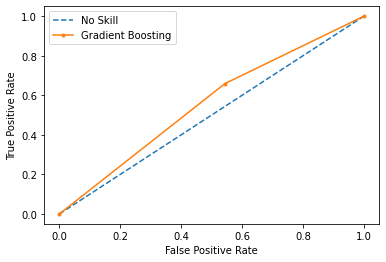

In [44]:
fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

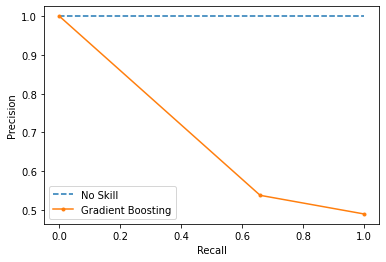

In [45]:
precision, recall, thresholds = precision_recall_curve(y_test5, y_pred5)
# plot the roc curve for the model
no_skill = len(y_test5[y_test5==1]) / len(y_test5)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Gradient Boosting')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()